Primeras filas del dataset:
   record  mean_rr  std_rr  skew_rr  kurt_rr label
0  A00001   761.67   61.30     1.06     7.72     N
1  A00002   819.44  258.53    -0.74    -1.11     N
2  A00003   916.26  452.40     2.26     7.25     N
3  A00004   936.04  178.68     0.57    -0.86     A
4  A00005   537.45  217.84     1.23     0.21     A

Descripción estadística:
            mean_rr        std_rr      skew_rr      kurt_rr
count   5774.000000   5774.000000  5765.000000  5765.000000
mean     959.936512    355.333121    -0.305242     4.281901
std      690.832326    850.848868     1.942746     7.214603
min      313.330000      0.000000    -7.430000    -2.000000
25%      723.905000     70.797500    -1.450000    -0.300000
50%      823.240000    146.715000    -0.030000     1.550000
75%      939.140000    256.820000     0.920000     6.040000
max    16644.440000  12456.080000     7.820000    78.170000

Tipos de datos:
record      object
mean_rr    float64
std_rr     float64
skew_rr    float64
kurt_rr

C:\Users\diego\AppData\Local\Temp\ipykernel_10124\1557632021.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


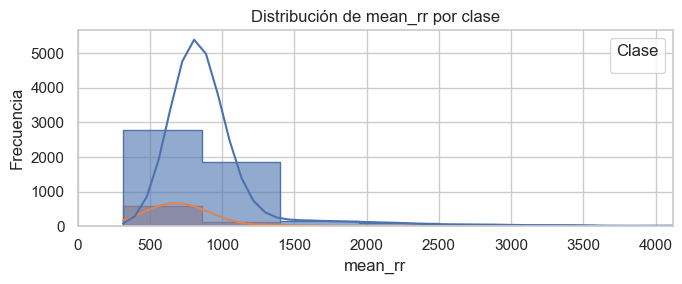

C:\Users\diego\AppData\Local\Temp\ipykernel_10124\1557632021.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


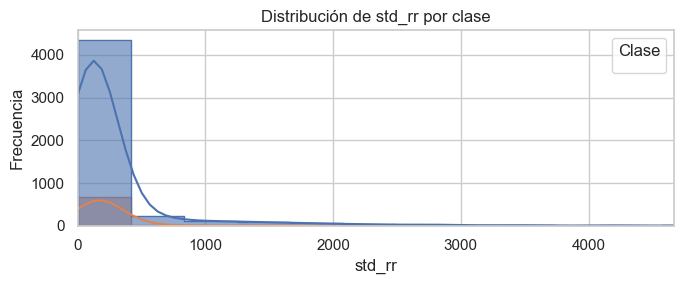

C:\Users\diego\AppData\Local\Temp\ipykernel_10124\1557632021.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


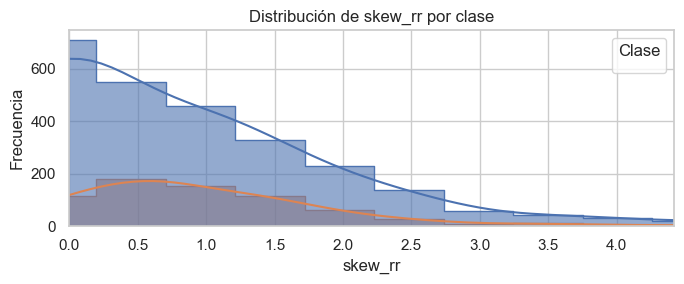

C:\Users\diego\AppData\Local\Temp\ipykernel_10124\1557632021.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


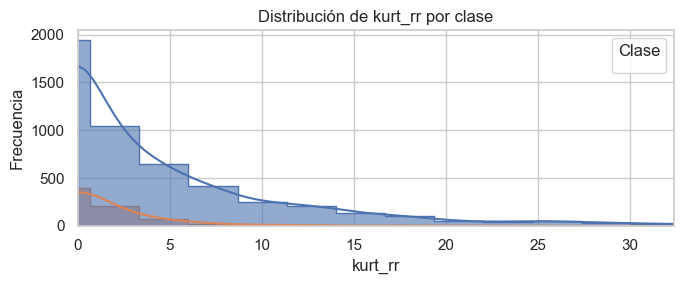

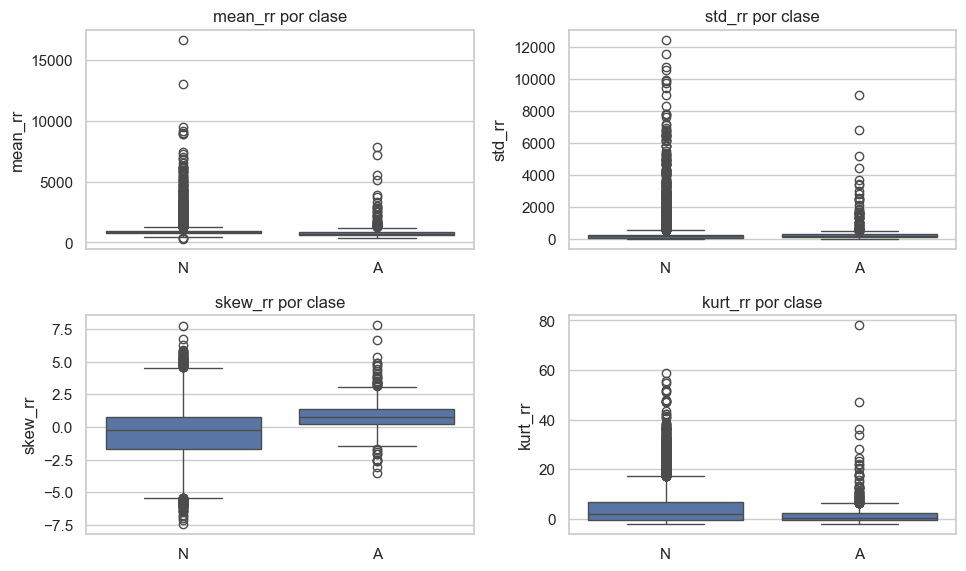


Comparación estadística entre clases (N vs A):
mean_rr: t = 8.22, p = 0.0000 Diferencia significativa
std_rr: t = 2.26, p = 0.0243 Diferencia significativa
skew_rr: t = nan, p = nan No significativa
kurt_rr: t = nan, p = nan No significativa

Observaciones iniciales:

- Las variables mean_rr y std_rr muestran diferencias claras entre AFib y Normal.
- skew y kurtosis ofrecen valor adicional, aunque menos marcadas.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Cargar CSV
df = pd.read_csv('ecg_rr_features_curado.csv')

# Inspección inicial 
print("Primeras filas del dataset:")
print(df.head())

print("\nDescripción estadística:")
print(df.describe())

print("\nTipos de datos:")
print(df.dtypes)

# Distribución de clases
print("\nDistribución de clases:")
print(df['label'].value_counts())

# Filtrar clases relevantes
df_n = df[df['label'] == 'N']
df_af = df[df['label'] == 'A']

# Variables a analizar
features = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']

# Histograma + KDE
sns.set(style="whitegrid")

for col in features:
    plt.figure(figsize=(7, 3))

    # Cálculo de límite superior automático (percentil 99)
    upper_limit = df[col].quantile(0.99)
    
    sns.histplot(
        data=df, x=col, hue='label', kde=True,
        stat='count', bins=30, element='step',
        common_norm=False, alpha=0.6
    )
    plt.title(f'Distribución de {col} por clase')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xlim(0, upper_limit)  
    plt.legend(title='Clase')
    plt.tight_layout()
    plt.show()

# Diagramas de caja
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df, x='label', y=col, ax=axes[i])
    axes[i].set_title(f'{col} por clase')
    axes[i].set_xlabel('')

plt.tight_layout(pad=1.2)
plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.08)
plt.show()

# T-TEST entre clases
print("\nComparación estadística entre clases (N vs A):")
for col in features:
    t_stat, p_val = ttest_ind(df_n[col], df_af[col], equal_var=False)
    print(f"{col}: t = {t_stat:.2f}, p = {p_val:.4f} {'Diferencia significativa' if p_val < 0.05 else 'No significativa'}")

# ---------- Comentario general ----------
print("\nObservaciones iniciales:")
print("""
- Las variables mean_rr y std_rr muestran diferencias claras entre AFib y Normal.
- skew y kurtosis ofrecen valor adicional, aunque menos marcadas.
""")
